In [11]:
from sklearnex import patch_sklearn

patch_sklearn()
from collections.abc import Iterable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

from drowsiness_detection.data import (session_type_mapping, load_experiment_objects,
                                       load_preprocessed_train_test_splits, label_names_dict)
from drowsiness_detection.visualize import (plot_roc_curve_from_log_dir,
                                            plot_learning_curve_from_log_dir)
from drowsiness_detection import config



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [16]:
# fixed experiment params
EXPERIMENT_IDS = (14,15,16)


## Plot ROC Curve of best model for 10, 20 and 60 seconds data

test accuracy = 0.6505004934442408
train accuracy = 0.6463427694284797
test accuracy = 0.6705865481141546
train accuracy = 0.6655288863066924
test accuracy = 0.6972123825658402
train accuracy = 0.6951604726436065


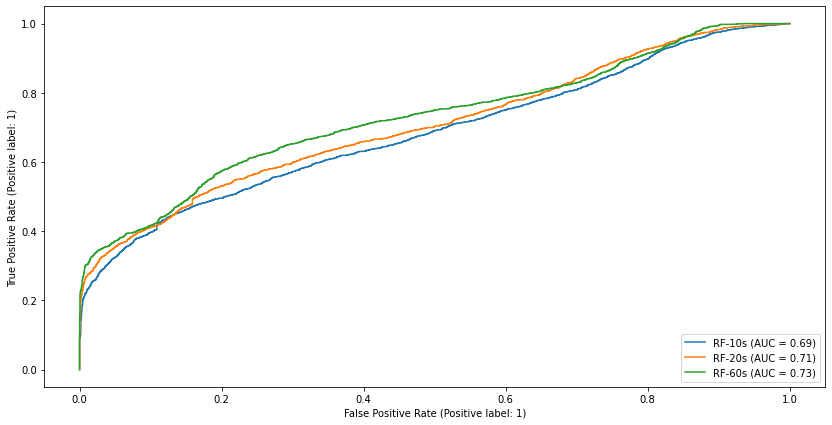

In [20]:
plt.rcParams["figure.figsize"] = 14, 7

fig, ax = plt.subplots()
# if not isinstance(ax, Iterable):

for experiment_id in EXPERIMENT_IDS:
    plot_roc_curve_from_log_dir(experiment_id=experiment_id, ax=ax, pos_label=1, plot_train_roc=False)


### Plot learning curve of best model for 10, 20 and 60 seconds data


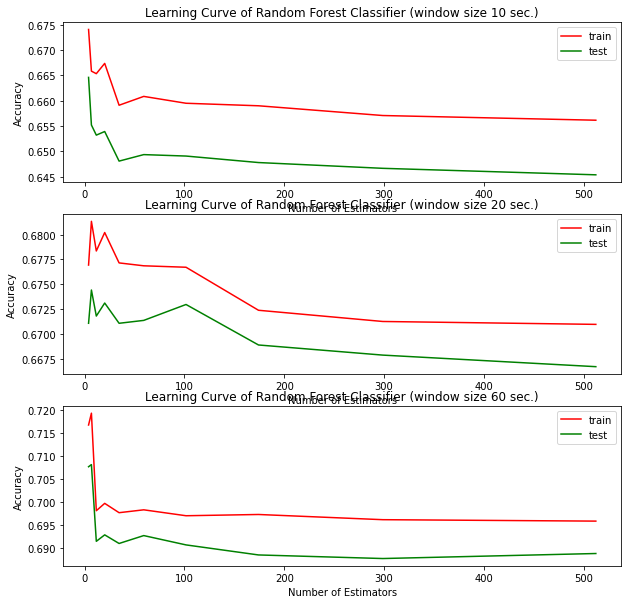

In [18]:
plt.rcParams["figure.figsize"] = 10, 10

n_estimator_options = np.logspace(2, 9, num=10, base=2)
_, axes = plt.subplots(len(EXPERIMENT_IDS), 1)
if not isinstance(axes, Iterable):  # if single experiment id given
    axes = [axes]
for experiment_id, ax in zip(EXPERIMENT_IDS, axes):
    plot_learning_curve_from_log_dir(experiment_id=experiment_id,
                                     n_estimator_options=n_estimator_options, ax=ax)


### Plot classification report of best model for 10, 20 and 60 seconds data


In [19]:
for experiment_id in EXPERIMENT_IDS:
    exp_config, best_estimator, _ = load_experiment_objects(experiment_id=experiment_id)

    window_size = exp_config["window_in_sec"]
    config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test, _ = load_preprocessed_train_test_splits(
        data_path=config.PATHS.WINDOW_FEATURES,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"])

    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]])
    print(report)

              precision    recall  f1-score   support

  not drowsy       0.70      0.69      0.69      4184
      drowsy       0.55      0.56      0.56      2838

    accuracy                           0.64      7022
   macro avg       0.62      0.63      0.62      7022
weighted avg       0.64      0.64      0.64      7022

              precision    recall  f1-score   support

  not drowsy       0.72      0.71      0.71      4092
      drowsy       0.59      0.60      0.59      2811

    accuracy                           0.67      6903
   macro avg       0.65      0.66      0.65      6903
weighted avg       0.67      0.67      0.67      6903

              precision    recall  f1-score   support

  not drowsy       0.75      0.72      0.74      3825
      drowsy       0.61      0.64      0.63      2603

    accuracy                           0.69      6428
   macro avg       0.68      0.68      0.68      6428
weighted avg       0.69      0.69      0.69      6428

